** Image Initialization **

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, TimeDistributed

/home/cbrom/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


** Generate Examples **

In [2]:
# generate the next frame in the sequence
def next_frame(last_row, last_frame, col):
    # next row scope
    lower = max(0, last_row - 1)
    upper = min(last_frame.shape[0] - 1, last_row + 1)
    new_row = random.randint(lower, upper)
    # copy frame so that the original frame doesn't change
    frame = last_frame.copy()
    frame[new_row, col] = 1
    return frame, new_row
    

In [3]:
def build_frames(size):
    frames = []
    frame = np.zeros((size, size))
    row = random.randint(0, size-1)
    # square movement
    right = 1 if random.random() < 0.5 else 0
    col = 0 if right else size - 1 # start point in col
    frame[row, col] = 1
    frames.append(frame)
    
    # generate next frames to form a video
    for i in range(1, size):
        col = i if right else size-1-i
        frame, row = next_frame(row, frame, col)
        frames.append(frame)
    return frames, right

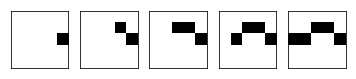

In [4]:
# generate sequence of frames
size = 5
frames, right = build_frames(size)

plt.figure()
for i in range(size):
    plt.subplot(1, size, i+1)
    plt.imshow(frames[i], cmap='Greys')
    
    # make it clear
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
def generate_examples(size, n_patterns, n_batches):
#     X, y = list(), list()
    n_batch_patterns = n_patterns // n_batches
    for _v in range(n_batch_patterns):
        X, y = list(), list()
        for _ in range(n_batches):
            frames, right = build_frames(size)
            X.append(frames)
            y.append(right)
        # resize to [samples, timesteps, width, height, channels]
        X = np.array(X).reshape(n_batches, size, size, size, 1)
        y = np.array(y).reshape(n_batches, 1)
        yield X, y
#     return X, y

** Define and Compile the Model **

In [6]:
# configure problem
size = 50
n_batchs = 32

# define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2, 2), activation='relu'),
                         input_shape=(None, size, size, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________
None


** Fit the Model **

In [7]:
# fit model
generator = generate_examples(size, 5000, n_batchs)
X, y = next(generator)
while True:
    try:
        X, y = next(generator)
        model.fit(X, y, batch_size=n_batchs, epochs=1)
    except StopIteration as exp:
        print("done!")
        break

Epoch 1/1
32/32 [==============================] - 1s 21ms/step - loss: 0.6786 - acc: 0.6562
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7008 - acc: 0.4062
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7127 - acc: 0.5000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7411 - acc: 0.3750
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7134 - acc: 0.5312
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7229 - acc: 0.3750
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7346 - acc: 0.4688
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.6983 - acc: 0.4375
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.7333 - acc: 0.4688
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.6916 - acc: 0.5625
Epoch 1/1
32/32 [==============================] - 0s 8ms/step - loss: 0.7152 -

32/32 [==============================] - 0s 6ms/step - loss: 0.0024 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0025 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0026 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0027 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 6ms/step - loss: 0.0020 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0022 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 6ms/step - loss: 0.0023 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0023 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0022 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0024 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 7ms/step - loss: 0.0024 - acc: 1.000

** Evaluate Model **

In [8]:
# evaluate model
X, y = next(generate_examples(size, 100, 1))
loss, acc = model.evaluate(X, y, verbose=0)
print('loss: %f, acc: %f' % (loss, acc*100))

loss: 0.000658, acc: 100.000000


** Make Predictions on the Model **

In [9]:
# prediction on new data
X, y = next(generate_examples(size, 1, 1))
yhat = model.predict_classes(X, verbose=0)
expected = "Right" if y[0]== 1 else "Left"
predicted = "Right" if yhat[0] == 1 else "Left"
print('Expected: %s, Predicted: %s' % (expected, predicted))

Expected: Left, Predicted: Left
